**Analyse de radiographies pulmonaires Covid-19**

    *   Description du projet : 

Afin de faire le diagnostic des patients au Covid-19, l’analyse de radiographies pulmonaires est une possibilité à explorer pour détecter plus facilement les cas positifs. Si la classification par le biais du deep learning de telles données se révèle efficace pour détecter les cas positifs, alors cette méthode peut être utilisée dans les hôpitaux et cliniques quand on ne peut pas faire de test classique.

    *   Contexte & problématique :

Les tests PCR sont rapidement devenus le standard, au sein des grandes métropoles, pour le diagnostic du COVID 19. 

Face aux risques de pénurie de réactifs PCR, méthode standard mais coûteuse et dépendante de ressources spécifiques pour la détection de maladies et infections diverses (comme le COVID-19, la coqueluche, etc.), il est essentiel de développer des solutions alternatives de détection accessibles, rapides, et fiables. Ces alternatives sont particulièrement nécessaires dans des contextes où les ressources sont limitées et où des résultats rapides sont critiques pour la prise en charge des patients.

L’objectif de ce projet est de créer un modèle de deep learning capable de classifier correctement les cas de COVID-19 à partir d’images de radiographies pulmonaires. Cette approche repose sur le développement d’un outil automatisé pouvant assister les cliniciens dans le diagnostic différentiel en complément ou en l’absence de tests biologiques.
Pour cela, nous partons d’un dataset composé d’images radiographiques thoraciques, classées en trois catégories : radiographie normale, radiographie COVID-19, et radiographie de pneumonie. Les similitudes radiologiques entre les infections liées au COVID-19 et d'autres types de pneumonies posent des défis diagnostiques importants. Il est donc crucial de distinguer ces deux classes de manière efficace pour éviter des erreurs pouvant entraîner des traitements inappropriés, des retards dans l’isolement ou des conséquences graves pour les patients.

Ce projet vise à explorer ces données en profondeur, en comprenant leur structure et leurs éventuelles limitations, afin de poser les bases d’un modèle robuste, capable de répondre à ces enjeux cliniques et techniques. En complément, des outils de visualisation et d’analyse permettront de mieux comprendre la complexité des données et de valider la pertinence du modèle dans un contexte réel.

    *   Le DataSet

Le data set sélectionné provient de Kaggle :
https://www.kaggle.com/datasets/anasmohammedtahir/covidqu?resource=download

Ces données compilées sont issues de recherches de l'université du Qatar et contiennent 33 920 images de radiographies pulmonaires.
Le dataset est composé de :
11 956 images de COVID-19
11 263 images de Non-COVID infections (Pneumonie virale ou bactérienne)
10 701 images de classe normal

Ce jeu de données est l'un des plus complet à ce jour. 
Dans ce set de données nous disposons uniquement d'images. Nous n'avons pas par exemple d'informations sur l'âge des patients, le sexe, leur hygiène de vie (fumeur, sportif,...).

Le dossier 'Lung Segmentation Data' contient le dataset entier des images radiographiques (33 920 images radiograhiques avec les masques pulmonaires de référence correspondants).
Nous n'utiliserons pas les masques pulmonaires car le but est de pouvoir créer une application où à partir d'une image rentrée par l'utilisateur, le modèle détecte dans quelle classe il apartient : normale, COVID, Pneumonie. Nous ne disposerons donc pas du masque pulmonaire.



Le set de données est divisé en 3 parties : des données d'entrainement (train), des données de test (test) et des données de validation (val).

Les données de validation permettent d'éviter l'overfitting et d'optimiser les hyperparamètres.

Les données de test sont pour évaluer la performance finale du modèle.

Dans la partie ci-dessous nous allons parcourir et analyser les images à notre disposition

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.io import imread
import os
import cv2

#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

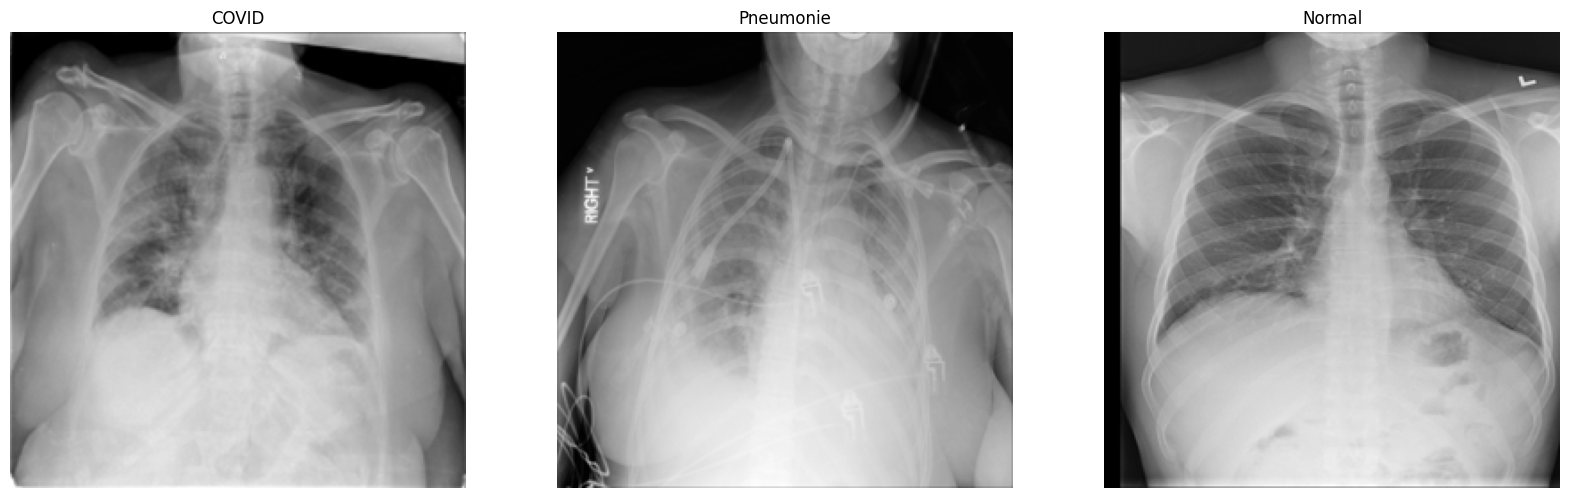

In [2]:
#dossier des images
path_data = '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/'

#afficher exemples d'image des 3 catégories

plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
chemin_image = path_data + "Train/COVID-19/images/covid_1.png"  
image=imread(chemin_image) 
plt.imshow(image,cmap='gray') #par défaut le cmap n'est pas gris, donne l'impression que l'image est en couleur 
plt.axis('off')
plt.title("COVID")

plt.subplot(1,3,2)
chemin_image = path_data + "Train/Non-COVID/images/non_COVID (1).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.title("Pneumonie")

plt.subplot(1,3,3)
chemin_image = path_data + "Train/Normal/images/Normal (1407).png"  
image=imread(chemin_image)
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.title("Normal");

* L'image COVID a beaucoup de tâches blanches dans les poumons.
* L'image Pneumonie a presque les poumons tout blanc.
* L'image Normal a des poumons bien distincts, on voit des ramifications blanches dedans avec des lignes très fines, plus fines que sur l'image COVID.
* A première vue, une des méthodes serait d'apprendre au modèle à isoler la partie des poumons et à regarder l'intérieur.

In [3]:
#Combien y-a-t-il d'images dans chaque set ?
#toutes les images sont au format png

# Compter les fichiers avec les extensions d'image
extensions_images = [".png"]

# Chemin vers le dossier contenant les images
dossier = Path(path_data + "Train/COVID-19/images/")
train_COVID = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier train_COVID contient {train_COVID} images.")

dossier = Path(path_data + "Train/Non-COVID/images/")
train_Pneumonie = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier train_Pneumonie contient {train_Pneumonie} images.")

dossier = Path(path_data + "Train/Normal/images/")
train_Normal = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier train_Normal contient {train_Normal} images.")

print("" )
dossier = Path(path_data + "Test/COVID-19/images/")
test_COVID = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier test_COVID contient {test_COVID} images.")

dossier = Path(path_data + "Test/Non-COVID/images/")
test_Pneumonie = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier test_Pneumonie contient {test_Pneumonie} images.")

dossier = Path(path_data + "Test/Normal/images/")
test_Normal = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier test_Normal contient {test_Normal} images.")

print("" )
dossier = Path(path_data + "Val/COVID-19/images/")
val_COVID = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier val_COVID contient {val_COVID} images.")

dossier = Path(path_data + "Val/Non-COVID/images/")
val_Pneumonie = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier val_Pneumonie contient {val_Pneumonie} images.")

dossier = Path(path_data + "Val/Normal/images/")
val_Normal = sum(1 for f in dossier.iterdir() if f.suffix.lower() in extensions_images)
print(f"Le dossier val_Normal contient {val_Normal} images.")
print("" )

total_COVID = train_COVID + test_COVID + val_COVID
total_Pneumonie = train_Pneumonie + test_Pneumonie + val_Pneumonie
total_Normal = train_Normal + test_Normal + val_Normal

print(f"Nombre total d'images COVID {total_COVID} images.")
print(f"Nombre total d'images Pneumonie {total_Pneumonie} images.")
print(f"Nombre total d'images Normal {total_Normal} images.")


Le dossier train_COVID contient 7658 images.
Le dossier train_Pneumonie contient 7208 images.
Le dossier train_Normal contient 6849 images.

Le dossier test_COVID contient 2395 images.
Le dossier test_Pneumonie contient 2253 images.
Le dossier test_Normal contient 2140 images.

Le dossier val_COVID contient 1903 images.
Le dossier val_Pneumonie contient 1802 images.
Le dossier val_Normal contient 1712 images.

Nombre total d'images COVID 11956 images.
Nombre total d'images Pneumonie 11263 images.
Nombre total d'images Normal 10701 images.


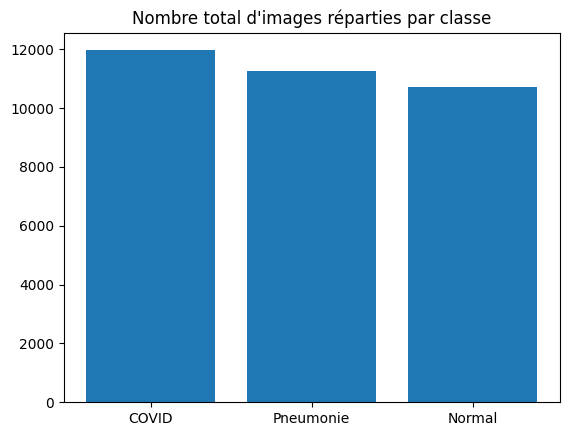

In [4]:
#Représentation graphique

total = [total_COVID,total_Pneumonie,total_Normal]
classes = ['COVID', 'Pneumonie', 'Normal']

plt.bar(classes,total)
plt.title("Nombre total d'images réparties par classe");

Les 3 classes ou 3 catégories sont bien réparties, il n'y a pas de déséquilibre entre elles.

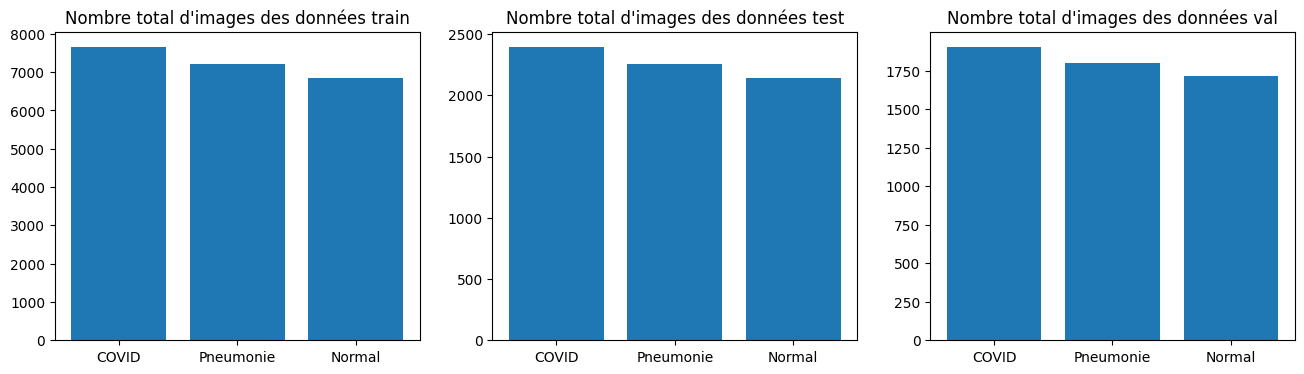

In [5]:
train = [train_COVID,train_Pneumonie,train_Normal]
test = [test_COVID,test_Pneumonie,test_Normal]
val = [val_COVID,val_Pneumonie,val_Normal]

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.bar(classes,train)
plt.title("Nombre total d'images des données train");

plt.subplot(132)
plt.bar(classes,test)
plt.title("Nombre total d'images des données test");

plt.subplot(133)
plt.bar(classes,val)
plt.title("Nombre total d'images des données val");


La répartition des classes entre les 3 ensembles de données est identique (le rapport des images COVID, Pneumonie et Normal est identique entre les jeux de données train, test et val).

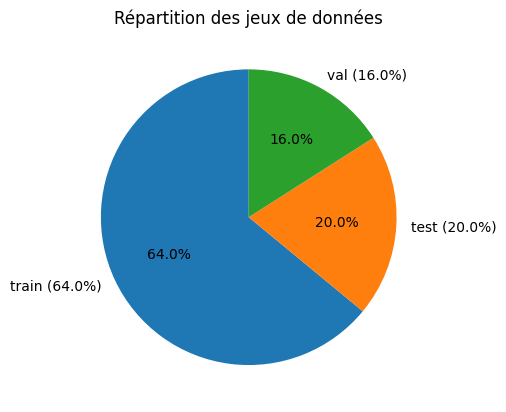

In [6]:
#représentation graphique

total_train = train_COVID + train_Pneumonie + train_Normal
total_test = test_COVID + test_Pneumonie + test_Normal
total_val = val_COVID + val_Pneumonie + val_Normal

total = total_train + total_test + total_val
#print("% des données train :" , round(total_train/total*100,0),'%')
#print("% des données test :" , round(total_test/total*100,0),'%')
#print("% des données val :" , round(total_val/total*100,0),'%')

# Calcul des pourcentages
pourcentages = [round(total_train / total * 100, 1), 
                round(total_test / total * 100, 1), 
                round(total_val / total * 100, 1)]


# Graphique camembert avec les pourcentages
plt.pie([total_train, total_test, total_val], 
        labels=[f'train ({pourcentages[0]}%)', 
                f'test ({pourcentages[1]}%)', 
                f'val ({pourcentages[2]}%)'], 
        autopct='%1.1f%%', startangle=90)
plt.title("Répartition des jeux de données")
plt.show()



In [7]:
#test d'analyse d'image

chemin_image = path_data + "Train/COVID-19/images/covid_1.png"  
image = imread(chemin_image)
print(image.shape) 

#retourne (256,256)
#une image est un tableau de 256 pixels par 256 pixels
#dimensions en noir et blanc car que 2 valeurs

(256, 256)


* La taille de l'image est (256,256).
* L'image est donc un tableau de 256 pixels par 256 pixels.
* C'est une image en noir et blanc car il n'y a que 2 dimensions.

In [8]:
#regarder si les images ont toutes la même taille (256,256)
#Test avec ce code sur plusieurs dossiers, OK toutes les images font (256,256)

from PIL import Image

# Chemin vers le dossier contenant les images
dossier = Path(path_data + "Train/COVID-19/images/")

# Variables pour compter et vérifier les tailles
total_images = 0
images_correctes = 0
images_incorrectes = []

# Parcours des fichiers dans le dossier
for fichier in dossier.iterdir():
    if fichier.suffix.lower() in extensions_images:  # Vérifie l'extension
        total_images += 1  # Compte le fichier
        try:
            with Image.open(fichier) as img:
                if img.size == (256, 256):
                    images_correctes += 1
                else:
                    images_incorrectes.append((fichier.name, img.size))
        except Exception as e:
            print(f"Erreur en lisant le fichier {fichier.name} : {e}")

# Résultats
print(f"Le dossier Train COVID contient {total_images} images.")
print(f"Nombre d'images avec la taille correcte (256, 256) : {images_correctes}")
if images_incorrectes:
    print("Les images suivantes ne respectent pas les dimensions (256, 256) :")
    for nom, taille in images_incorrectes:
        print(f"- {nom} avec une taille de {taille}")


Le dossier Train COVID contient 7658 images.
Nombre d'images avec la taille correcte (256, 256) : 7658


In [9]:
image_path = path_data + "Train/COVID-19/images/covid_1.png"

image = imread(image_path)
print(image)

[[118  16   0 ... 173 177 129]
 [121  16   0 ... 244 235 167]
 [ 78  11   0 ... 233 246 172]
 ...
 [255 255 199 ...  92 128 161]
 [255 255 232 ... 101 159 174]
 [255 255 249 ... 141 216 174]]


* une image est un tableau de 256*256
* chaque valeur à l'intérieur correspond à un pixel
* un pixel équivaut à un niveau de gris
* si le pixel=0 alors c'est noir
* si le pixel=255 alors c'est blanc
